# Домашнее задание
1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
(разделяющую плоскость можно не строить, но обратите внимание, что
класса 3).
6. Отбросьте целевую переменную и оставьте только два признака -
sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и
визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [97]:
# 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
iris_dataset = load_iris()
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
# загружаем данные в датафрейм
#print(iris_df)
iris_data = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

In [11]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
# 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
irs = iris_data[['sepal length (cm)', 'sepal width (cm)']]
irs.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [22]:
variety = iris_dataset.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
# 3. Разделите данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
# Исходный датасет относительно невелик (150 строк), поэтому для тестовых данных оставляем 20% строк (30)
X_train, X_test, y_train, y_test = train_test_split(irs, variety, test_size=0.20)
# Смотрим параметры тестовой выборки (30 строк)
X_test.describe()

,sepal length (cm),sepal width (cm)
count,30.000000,30.000000
mean,5.706667,3.073333
std,0.789995,0.453289
min,4.400000,2.300000
25%,5.100000,2.725000
50%,5.550000,3.000000
75%,6.075000,3.475000
max,7.700000,3.800000


In [31]:
# 4. Постройте модель LDA (линейный дискриминантный анализ)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# Обучаем и предсказываем
lda.fit(X_train, y_train)
y_predict = lda.predict(X_test)
y_predict

array([0, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 2, 1, 0, 1])

In [34]:
# сравниваем прогноз и реальные данные
result = pd.DataFrame([y_predict, y_test]).T
result

,0,1
0,0,0
1,1,1
2,2,2
3,2,2
4,1,2
5,0,0
6,2,2
7,2,2
8,2,2
9,0,0


In [35]:
# 4 ошибки на 30 строк - примерно 13 процентов. Проверяем:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)
# так и есть

0.8666666666666667

In [36]:
# 5. Визуализируйте предсказания для тестовой выборки и центры классов 
# (разделяющую плоскость можно не строить, но обратите внимание, что класса 3).
# для визуализации предсказаний вначале смотрим коэффициенты дискриминатных линий
lda.coef_
# Видим, что модуль коэффициентов для первого из трех кластеров больше, чем для других двух. 
# Вероятно, первый кластер более очевиден

array([[-6.36183397,  7.9762473 ],
       [ 1.93828068, -3.89962378],
       [ 4.16049506, -3.78265106]])

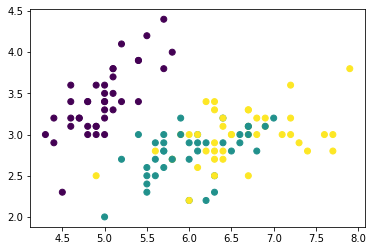

In [37]:
# Смотрим график рассеяния трех кластеров
plt.scatter(x=X_train['sepal length (cm)'], y=X_train['sepal width (cm)'], c=y_train)
plt.show()
# На визуализации видно, насколько неочевидно разделение 2 и 3 кластеров

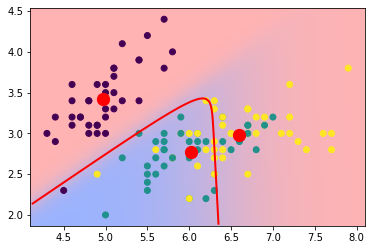

In [75]:
# Пробуем изменить тип визуализации, найти центроиды и нарисовать контур областей
# За основу взят код из ноутбука с лекции, но несколько параметров подкручены, чтобы посмотреть, что на что влияет
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.6, 0.6)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)
# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='o')

# делаем условную "сетку"
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='red')

In [76]:
# 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width (вроде бы мы это сделали раньше?)
# 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
# По предыдущим этапам кажется очевидым выбор трех кластеров, хотя возможно рассмотреть и двухкластерную историю
from sklearn.cluster import KMeans

In [86]:
# Для начала посмотрим трехкластерный вариант
kmeans3 = KMeans(n_clusters=3)
# Обучаем модель на полном наборе не нормализованных данных. Смысла в нормализации нет, данные в колонках одного порядка
clusters3 = kmeans3.fit_predict(irs)
clusters3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

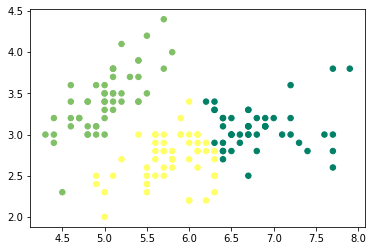

In [87]:
plt.scatter(irs['sepal length (cm)'], irs['sepal width (cm)'], cmap='summer', c=clusters3, s=30)

In [88]:
# А теперь то же самое, но с двумя кластерами
kmeans2 = KMeans(n_clusters=2)
# Обучаем модель на полном наборе не нормализованных данных. Смысла в нормализации нет, данные в колонках одного порядка
clusters2 = kmeans2.fit_predict(irs)
clusters2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

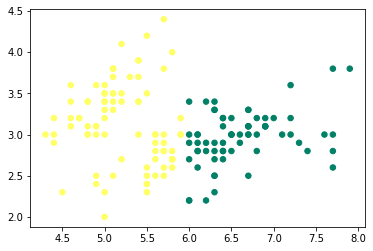

In [90]:
plt.scatter(irs['sepal length (cm)'], irs['sepal width (cm)'], cmap='summer', c=clusters2, s=30)
# Ну так себе. Три кластера выглядят более естественно.

In [91]:
# Посмотрим, нет ли смысла в четырех или пяти кластерах. Или больше.
# строим график локтя

# создаем список для инерции
iris_inertia = []
# задаем диапазон кластеров
iris_klasters = range(1, 10)

for k in iris_klasters:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(irs)
    # добавляем инерцию каждой модели в список
    iris_inertia.append(clf_kmeans.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


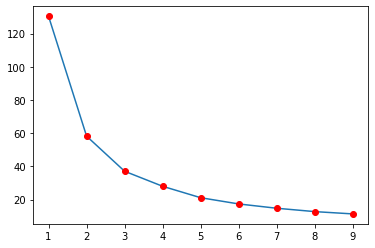

In [92]:
plt.plot(iris_klasters, iris_inertia)
plt.plot(iris_klasters, iris_inertia ,'ro')

# Похоже, что 3 кластера - это оптимум

In [94]:
# Дополнительные самостоятельные исследования.
# Стало интересно, насколько эффективно пройдет кластеризация не по двум, а по всем четырем доступным параметрам датасета
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(iris_data, variety, test_size=0.20)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_full = LinearDiscriminantAnalysis()
# Обучаем и предсказываем
lda_full.fit(X_train_f, y_train_f)
y_predict_f = lda_full.predict(X_test_f)
# y_predict
result_f = pd.DataFrame([y_predict_f, y_test_f]).T
result_f

,0,1
0,2,2
1,1,1
2,1,1
3,1,1
4,2,2
5,0,0
6,2,2
7,2,2
8,2,2
9,0,0


In [96]:
# Видно, что в отличие от модели, построенной только на двух колонках, модель на четырех колонках дает на текущей выборке
# стопроцентную точность предсказаний.
lda_full.coef_
# По таблице коэффициентов дискриминантных линий видно, что для двух отброшенных при первом анализе колонок коэффициенты 
# гораздо мощнее, а значит можно было попробовать сделать ту же работу, но взяв за основу две последних колонки датасета.
# Видимо, разнообразие лепестков цветков ириса является более мощным признаком, чем разнообразие чашелистиков.

array([[  7.41289497,   8.98329408, -17.41248629, -16.78760434],
       [ -2.19332474,  -3.49656501,   5.04374624,   2.29190293],
       [ -5.37884631,  -5.59147455,  12.75426604,  15.1380066 ]])